In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot') 

In [2]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1,2,3])
G.nodes() #output is tuple

NodeView((1, 2, 3))

In [3]:
# Shows with node metadata.
G.nodes(data=True) #output is dictionary

NodeDataView({1: {}, 2: {}, 3: {}})

In [4]:
# Lets add a node metadata called label.
G.nodes[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

In [5]:
nodes_of_interest = [n for n, d in G.nodes(data=True)  if d.get('label') == 'blue']
nodes_of_interest

[1]

In [6]:
# we are iterating over NodeDataView which is similar to dict but not the same.
# We would iterate over a dict like this.
dictionary = {1:4, 2:9}
[k for k,j in dictionary.items()]

[1, 2]

In [7]:
# adding an edge.
G.add_edge(1,2)
G.edges # note how calling G.edges return a list of tuples.

EdgeView([(1, 2)])

In [8]:
# show with edge metadata.
G.edges(data=True) 

EdgeDataView([(1, 2, {})])

In [9]:
# convert to list datatype to access an element.
list(G.edges(data=True))

[(1, 2, {})]

In [10]:
# adding metadata to edge.
G.edges[1,2]['count'] =3
G.edges(data=True) 

EdgeDataView([(1, 2, {'count': 3})])

In [11]:
# Weight is a special metadata.
# Set the weight of the edge
G.edges[1,2]['weight']=2

In [17]:
edges_of_interest = [(u, v) for u, v, d in G.edges(data=True) if d.get('weight') == 2]
edges_of_interest

[(1, 2)]

In [16]:
 G.edges(data=True)

EdgeDataView([(1, 2, {'count': 3, 'weight': 2})])

In [ ]:
# Plotting network.
nx.draw(G)
plt.show()

In [18]:
# Gives the total number of nodes.
len(G)

3

In [19]:
type(G) # Graph tells that its undirected graph.

networkx.classes.graph.Graph

In [20]:
G.edges()

EdgeView([(1, 2)])

In [21]:
# Set the weight of every edge involving node 2 to be equal to 1.1


# Iterate over all the edges (with metadata)
for u, v, d in G.edges(data=True):

    # Check if node 293 is involved
    if 2 in [u,v]:

        # Set the weight to 1.1
        G.edges[u,v]['weight'] = 1.1

In [22]:
G.edges(data=True)

EdgeDataView([(1, 2, {'count': 3, 'weight': 1.1})])

In [23]:
# Finding self loop
# Lets first add a self loop in node 3 and 6.

G.add_edge(3,3)
G.add_edge(6,6)
G.edges()

EdgeView([(1, 2), (3, 3), (6, 6)])

In [24]:
# this returns the self loops.
list(nx.selfloop_edges(G))

[(3, 3), (6, 6)]

In [25]:
nx.number_of_selfloops(G)

2

In [27]:
#Lets create a Graph with 6 nodes and add some random edges between them

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])


for node in G.nodes():
    edge = np.random.choice(G.nodes(), 2, replace=True) 
    G.add_edge(edge[0],edge[1])
G.edges()

EdgeView([(1, 6), (1, 3), (2, 3), (3, 6), (4, 6)])

In [29]:
G.add_edge(3,3)
G.add_edge(6,6)
G.edges()

EdgeView([(1, 6), (1, 3), (2, 3), (3, 6), (3, 3), (4, 6), (6, 6)])

In [ ]:
len(G.nodes())
len(G.edges())

In [30]:
# Finding self loop nodes using a custom function.

def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u==v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

find_selfloop_nodes(G)

[3, 6]

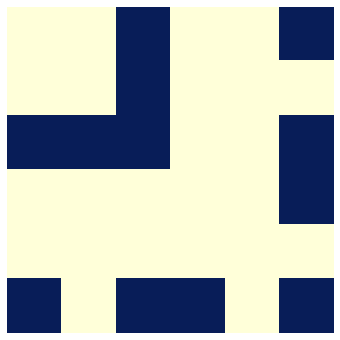

[[0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1.]]


In [36]:
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(G)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(G)
print(A)

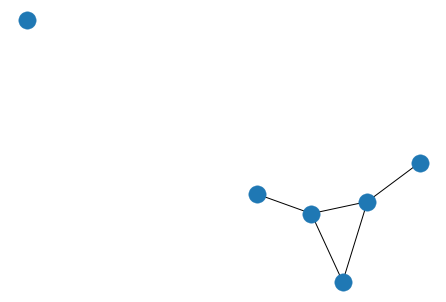

In [38]:
nx.draw(G)
plt.show()

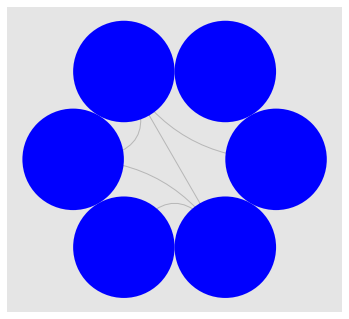

In [40]:
# Create the CircosPlot object: c
c = nv.CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

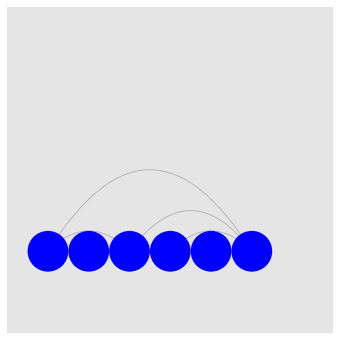

In [44]:
a = nv.ArcPlot(G)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# # Create the customized ArcPlot object: a2
# a2 = nv.ArcPlot(G, node_order='category', node_color='category')

# # Draw a2 to the screen
# a2.draw()

# # Display the plot
# plt.show()